# Global happiness score report
<p>This report, produced by the United Nations Sustainable Development Solutions Network (SDSN), measures self-reported happiness scores and a number of contributing factors in 155 of the world's 195 countries.  Key metrics here are: </p>
<ul>
    <li><b>Happiness Score: </b> surveys ask the respondent to imagine a scale from one to ten, with one being the least happy life they can imagine for themselves, and ten being the happiest, and rank their life right now on this scale.</li>
    <li><b>Factor scores (GDP percapita, Health, Freedom, etc): </b> some of these factors are external facts (e.g. GDP per capita); others are self-reported (e.g. Freedom: how content are you with the degree of freedom you have to make life choices for yourself?). Crucially, the scores in the chart do not represent the raw scores, but <i>the amount of the happiness score accounted for by this factor</i>, as defined by the raw score multiplied by the correlation (r^2, I assume) of that factor in driving happiness scores across the dataset.</li>
    <li><b>Dystopia residual: </b> The number of points by which the happiness score exceeds (or, for negative numbers, falls short of) the happiness score that the measured factors predict.</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
happiness_df = pd.read_csv("happiness_2017.csv")
happiness_df = happiness_df.rename(columns={
    "Economy..GDP.per.Capita.": "GDP_per_capita",
    "Health..Life.Expectancy.": "Life_expectancy",
    "Trust..Government.Corruption.": "Trust_in_gov"
    })
happiness_df.head()

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,GDP_per_capita,Family,Life_expectancy,Freedom,Generosity,Trust_in_gov,Dystopia.Residual
0,Norway,Europe,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Europe,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Europe,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Europe,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Europe,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


# Choose one variable and plot that variable four different ways.

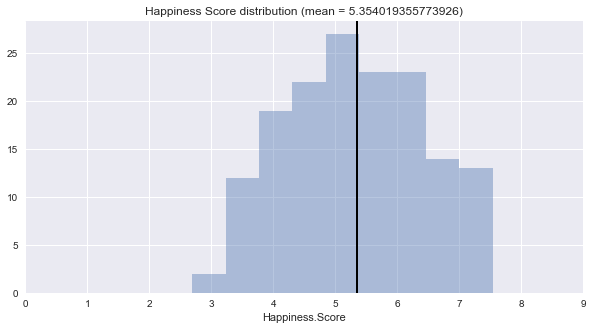

In [3]:
plt.figure(figsize=(10,5))
ax = sns.distplot(happiness_df["Happiness.Score"], kde=False)
plt.axvline(happiness_df["Happiness.Score"].mean(), color='black', linewidth=2)
plt.title("Happiness Score distribution (mean = {})".format(happiness_df["Happiness.Score"].mean()))
plt.xticks(range(0,10,1))
plt.show()

<p>The basic histogram above does a nice job displaying the distribution of happiness scores, as well as the mean.  Strengths: it's easy to read, and by maintaining the full range on the x axis it gives an accurate sense of how the scores are distributed across the range.  Another strength is also its weakness: the discrete binning emphasizes discrepancies between particular intervals, but can distract from the sense of overall shape of the distribution.  More, smaller bins will decrease this characteristic.</p>

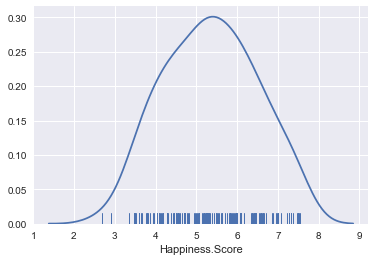

In [4]:
ax = sns.distplot(happiness_df["Happiness.Score"], hist=False, rug=True)
plt.show()

<p>This probability density function loses some of the detail features of the discrete histogram (e.g., the sudden drop at the top of the range), but it gives a nice overall sense of the distribution's shape, with the bulge around the second quartile.  The rug on bottom helps maintain a sense of the concentration of individual/discrete instances.</p>

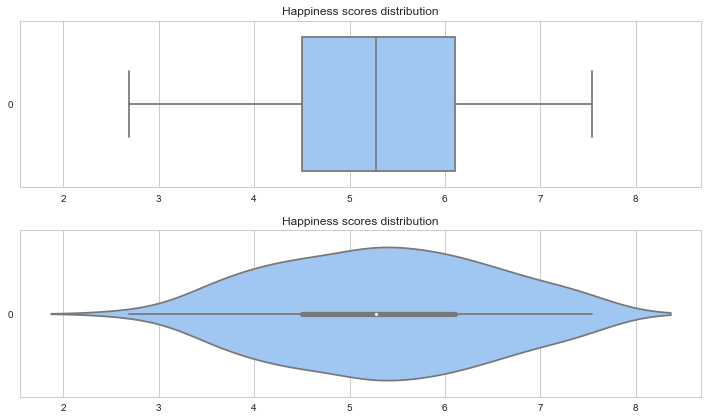

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
ax1 = plt.subplot(2,1,1)
sns.boxplot(data=happiness_df["Happiness.Score"], orient="h", palette="pastel")
plt.title("Happiness scores distribution")

ax2 = plt.subplot(2,1,2, sharex=ax1)
sns.violinplot(data=happiness_df["Happiness.Score"], orient="h", palette="pastel")
plt.title("Happiness scores distribution")
plt.tight_layout()
plt.show()

<p>I've set the two charts above to share the x axis for a more telling comparison: the violin plot on bottom contains all the same information as the box plot on top - primarily, the five-point summary - but also gives a probability density function of the values.  But the box plot, while it gives less information about the distribution, communicates the five-point summary very clearly: the median is a line instead of a point, and the IQR is a colored rectangle instead of an increased thickness of line.  So the tradeoff here is basically clarity (box plot) vs information density (violin plot).</p>

# Choose two continuous variables, and plot them three different ways.

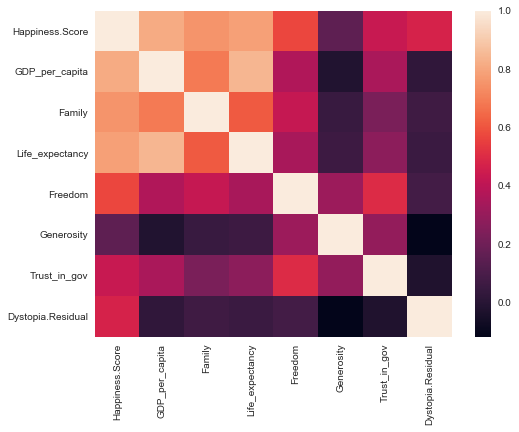

In [6]:
plt.figure(figsize=(8,6))

# FOR MORE DETAIL I also tried this - exploratorily useful, but a mess to look at
# sns.pairplot(continuous_df, kind="reg")
# plt.show()

continuous_df = happiness_df.drop(["Country","Region", "Happiness.Rank", "Whisker.high", "Whisker.low"], axis=1)
corr = continuous_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

<p>Preliminary: here's what I used to decide which variables might be interesting to plot against each other.</p>

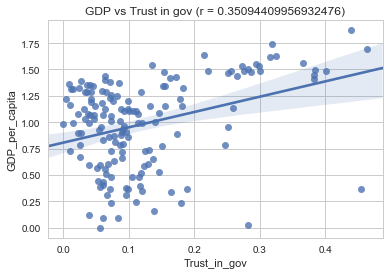

In [7]:
x = happiness_df["Trust_in_gov"]
y = happiness_df["GDP_per_capita"]
sns.regplot(x, y)
r = np.corrcoef(x,y)[0,1]
plt.title("GDP vs Trust in gov (r = {})".format(r))
plt.show()

<p>A basic scatterplot with a regression line gives a nice picture of the distribution and linear correlation, which is fairly weak.</p>

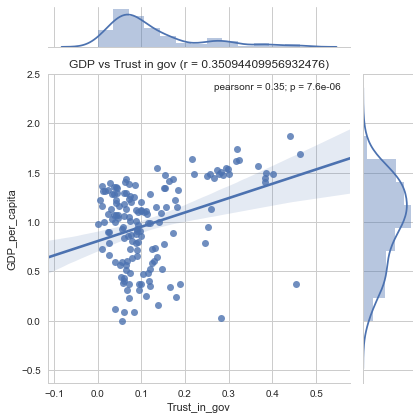

In [8]:
sns.jointplot(x, y, kind="reg")
plt.title("GDP vs Trust in gov (r = {})".format(r))
plt.tight_layout()
plt.show()


<p>A jointplot, with a histogram on each axis, is noisier to look at, but it clarifies the distribution for the reader.  In this instance specifically, it highlights the strongly right-skewed distribution of the trust in government, which can get lost in the simple regression plot if the reader focuses on the regression line.  This skew / clustering indicates that a large majority of countries surveyed do not have governments viewed as trustworthy or uncorrupt.</p>

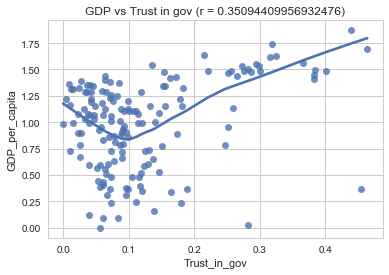

Correlation where trust in gov > .5: 0.5000633122500017


In [9]:
sns.regplot(x, y, lowess=True)
plt.title("GDP vs Trust in gov (r = {})".format(r))
plt.show()

y = happiness_df[happiness_df["Trust_in_gov"] > .1]["GDP_per_capita"]
x = happiness_df[happiness_df["Trust_in_gov"] > .1]["Trust_in_gov"]
r = np.corrcoef(x,y)[0,1]
print("Correlation where trust in gov > .5: {}".format(r))

<p>This plot featuring locally weighted linear regression (lowess) reveals an important and previously hidden feature of this correlation: it only holds (and more strongly) in cases that meet a minimum level of government trustworthiness (0.1, somewhat arbitrarily).  In the roughly half of the surveyed countries that do not meet this threshold, there is actually a negative correlation - although the points are so tightly clustered that this trend may not be significant.  In this case, the lowess regression is significantly more revealing than the plain regression, and doesn't seem to be picking up much noise or obsucuring the general trend, which are the typical downsides of lowess regression.</p>

# Choose one continuous variable and one categorical variable, and plot them six different ways.


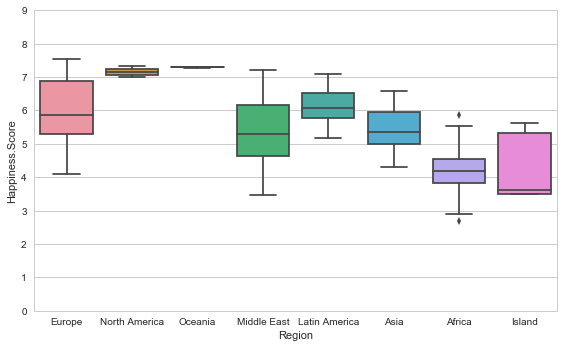

In [10]:
x = happiness_df["Region"]
y = happiness_df["Happiness.Score"]
plt.figure(figsize=(8,5))
sns.boxplot(x,y)
plt.yticks(range(0,10,1))
plt.tight_layout()
plt.show()

This one works well for the larger distributions, but not for the smaller ones (North America and Oceania).  The x axis automatically truncates unless explicitly set, which seems somewhat undesirable for representing the proportions accurately.

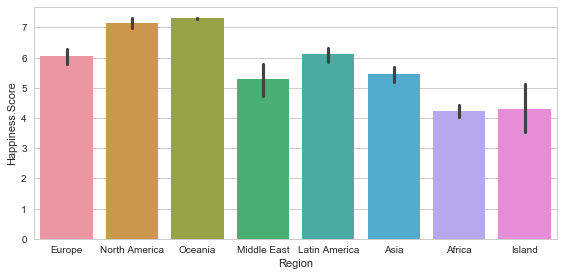

In [11]:
plt.figure(figsize=(8,4))
sns.barplot(x,y)
plt.tight_layout()
plt.show()

This shows less information about the distribution but does include the error bars, which are informative.  BUT: why aren't the error bars bigger for North America nad Oceania, which only have two countries each?

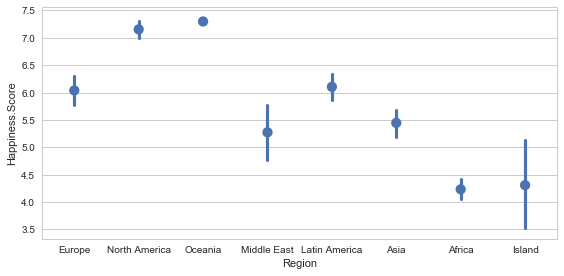

In [12]:
plt.figure(figsize=(8,4))
sns.pointplot(x,y, join=False)
plt.tight_layout()
plt.show()

This is simple and clean - in some ways nicer than the bar plot.  Same error bar problem, though.

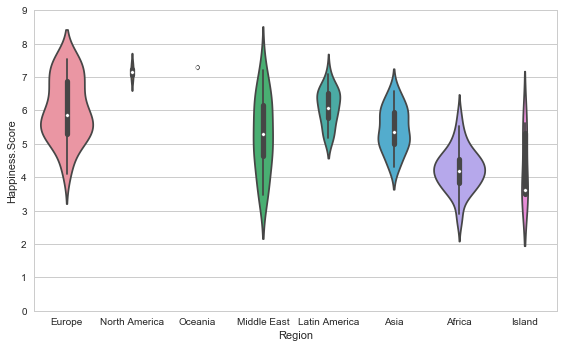

In [13]:
plt.figure(figsize=(8,5))
sns.violinplot(x,y, scale="count")
plt.yticks(range(0,10,1))
plt.tight_layout()
plt.show()

Good information density, but struggles with the small distributions.

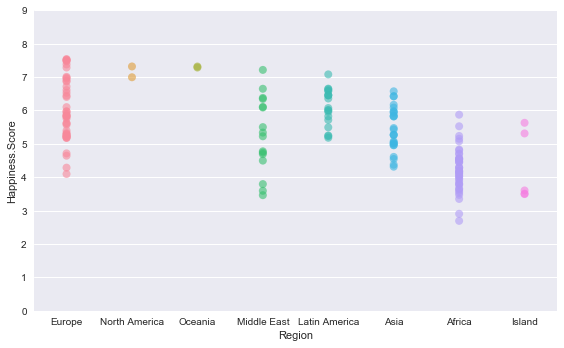

In [14]:
sns.set()
plt.figure(figsize=(8,5))
sns.stripplot(x,y, size=8, alpha=0.6)
plt.yticks(range(0,10,1))
plt.tight_layout()
plt.show()

Captures the small distributions better, but isn't great with the larger distributions (it's hard to tell exactly how many dots are overlapping in the middle).

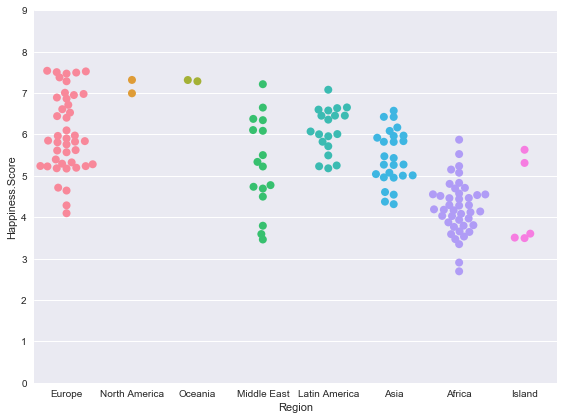

In [15]:
plt.figure(figsize=(8,6))
sns.swarmplot(x,y, size=8)
plt.yticks(range(0,10,1))
plt.tight_layout()
plt.show()

Aaaaaand we have a winner!  The swarmplot effectively communicates the difference in averages and the distributions, while also showing which distributions are large and which are small and representing both accurately.